# 24 Sklearn Model Validation

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings(action="ignore", module="matplotlib", message="Adding an axes using the")
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8, stratify=y)

In [5]:
X_train.shape

(105, 4)

In [6]:
X_test.shape

(45, 4)

In [7]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
clf = svc.fit(X_train, y_train)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
y_pred

array([1, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2,
       1])

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9333333333333333


## Confusion matrix

* tp
* fp
* fn
* tn 

```
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)
```

In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]


```
ts   fcs  fgs
fsc  tc   fgc
fsg  fcg  tg
```

fcs: true: versicolor, but model thought setosa
fsc: true: setosa, but model thought versicolor

In [12]:
import numpy as np
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 14]])

In [13]:
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_norm)

[[1.         0.         0.        ]
 [0.         0.86666667 0.13333333]
 [0.         0.06666667 0.93333333]]


In [14]:
cm.sum(axis=1)

array([15, 15, 15])

In [15]:
cm.sum(axis=1)[:, np.newaxis]

array([[15],
       [15],
       [15]])

In [16]:
cm.sum(axis=1).reshape(3, 1)

array([[15],
       [15],
       [15]])

Text(50,0.5,'Ground Truth')

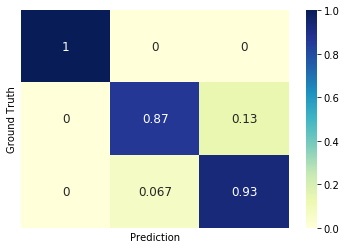

In [17]:
import seaborn as sns
sns.heatmap(cm_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 12}, xticklabels=False, yticklabels=False)
figure = plt.gcf()
ax = figure.add_subplot(111)
ax.set_xlabel('Prediction')
ax.set_ylabel('Ground Truth')

### Precision Recall

Simple example.

> Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

> The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

> However, visual interpretation and comparisons of ROC curves based on imbalanced data sets can be misleading. An alternative to a ROC curve is a precision-recall curve (PRC). It is used less frequently than ROC curves but as we shall see PRC might be a better choice for imbalanced datasets.

> These quantities are also related to the (F_1) score, which is defined as the harmonic mean of precision and recall.

2 * precision * recall / (precision + recall)

Longer example.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [19]:
colors = ['blue', 'orange', 'red']

iris = load_iris()

X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [20]:
n_classes

3

In [21]:
y[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

one_vs_rest = OneVsRestClassifier(SVC(kernel='rbf', C=10, gamma=100, probability=True, random_state=12))

# decision_function(X) 	Returns the distance of each sample from the decision boundary for each class.
y_score = one_vs_rest.fit(X_train, y_train).decision_function(X_test)

y_true, y_pred = y_test, one_vs_rest.predict(X_test)

In [23]:
y_true[:4]

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [24]:
y_pred[:4]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [25]:
precision, recall, avg_precision = {}, {}, {}

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true[:, i],
                                                        y_score[:, i])
    avg_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

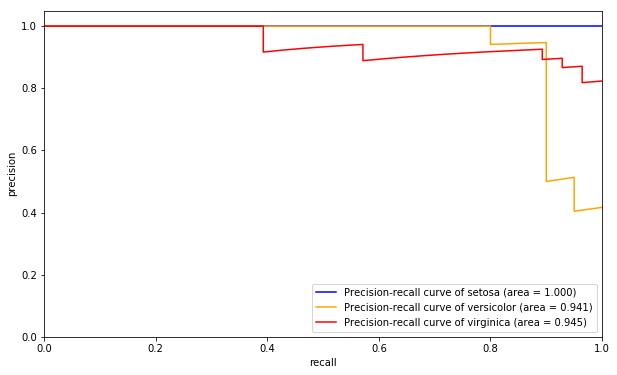

In [26]:
fig = plt.figure(1, figsize=(10, 6))

for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color,
             label='Precision-recall curve of {0} (area = {1:0.3f})'
                   ''.format(iris.target_names[i], avg_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc="lower right")

### Classification Report

In [27]:
from sklearn.metrics import classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

svc = SVC(kernel='rbf', C=1, gamma=1)
clf = svc.fit(X_train, y_train)
y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred, digits=3, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa      1.000     1.000     1.000        15
 versicolor      0.933     0.933     0.933        15
  virginica      0.933     0.933     0.933        15

avg / total      0.956     0.956     0.956        45



### ROC curve

False positive rate ( fp / (fp + tn) ) vs true positive rate ( tp / (tp + fp) )

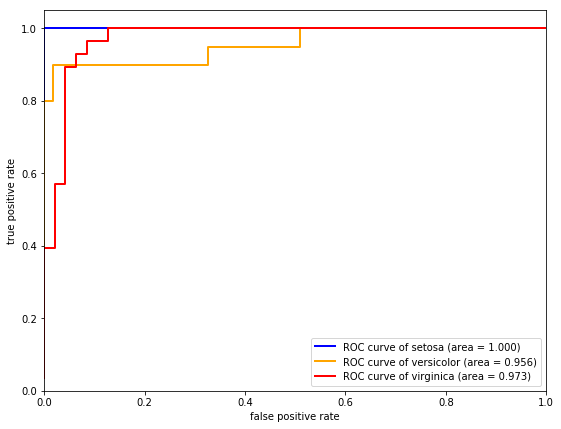

In [28]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

from scipy import interp

colors = ['blue', 'orange', 'red']

iris = load_iris()

X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

one_vs_rest = OneVsRestClassifier(SVC(kernel='rbf', C=10, gamma=100, probability=True, random_state=12))
y_score = one_vs_rest.fit(X_train, y_train).decision_function(X_test)
y_true, y_pred = y_test, one_vs_rest.predict(X_test)

fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig = plt.figure(1, figsize=(9, 7))
plt.clf()
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} (area = {1:0.3f})'
                   ''.format(iris.target_names[i], roc_auc[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.show()

In [29]:
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

0.75

### Regression metrics

In [30]:
import sklearn.datasets as data
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

boston = data.load_boston()
X = boston.data[:, 5:6]
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=112)

lr = lm.LinearRegression()
lr.fit(X_train, y_train)

/Users/tir/.virtualenvs/mlpy/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
y_pred = lr.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

In [33]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(median_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

48.20396841106558
4.7069613412271085
2.8851215093348284
0.42203569171371


In [34]:
y_train_pred = lr.predict(X_train)

In [35]:
print(mean_squared_error(y_train, y_train_pred))
print(mean_absolute_error(y_train, y_train_pred))
print(median_absolute_error(y_train, y_train_pred))
print(r2_score(y_train, y_train_pred))

41.651020107769185
4.329310287661524
2.8606587005308413
0.5089684947687656


### Validation

In [36]:
iris = load_iris()

X = iris.data
y = iris.target
svc = SVC(kernel='rbf', C=1, gamma=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=12)

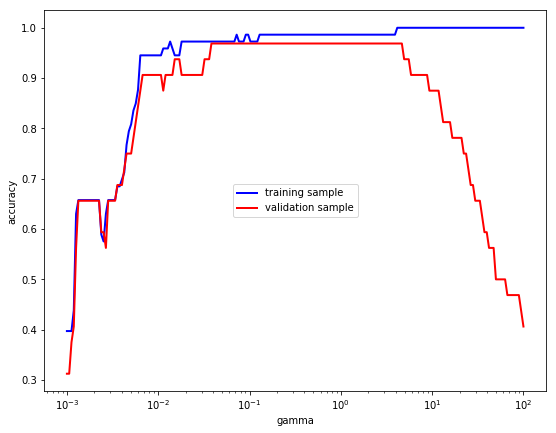

In [37]:
fig = plt.figure(1, figsize=(9, 7))
ax = fig.add_subplot(111)

param_range = np.logspace(-3, 2, 200)
train_scores, val_scores = [], []

for g in param_range:
    svc = SVC(kernel='rbf', C=1, gamma=g)
    clf = svc.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    val_scores.append(clf.score(X_val, y_val))
    
best_param = param_range[np.argmax(val_scores)]

plt.plot(param_range, train_scores, label="training sample", color="b", lw=2)
plt.plot(param_range, val_scores, label="validation sample", color="r", lw=2)

ax.set_xscale( "log" )
plt.xlabel("gamma")
plt.ylabel("accuracy")
plt.axis("tight")
plt.legend(loc='center')

plt.show()

In [38]:
best_param = param_range[np.argmax(val_scores)]
print("Best gamma value:", best_param)

Best gamma value: 0.038274944785163134


In [39]:
svc = SVC(kernel='rbf', C=1, gamma=best_param)
clf = svc.fit(X_train, y_train)
print("Best train accuracy:", clf.score(X_train, y_train))
print("Best val accuracy:", clf.score(X_val, y_val))
print("Best test accuracy:", clf.score(X_test, y_test))

Best train accuracy: 0.9726027397260274
Best val accuracy: 0.96875
Best test accuracy: 0.9555555555555556


### Cross-Validation

Train accuracy: 0.981 +/- 0.046
Cross validation accuracy: 0.988 +/- 0.031
Best gamma value: 0.08119844993184012
Best train accuracy: 0.9714285714285714
Best xval accuracy: 0.99375 +/- 0.012499999999999999
Best test accuracy: 0.9777777777777777


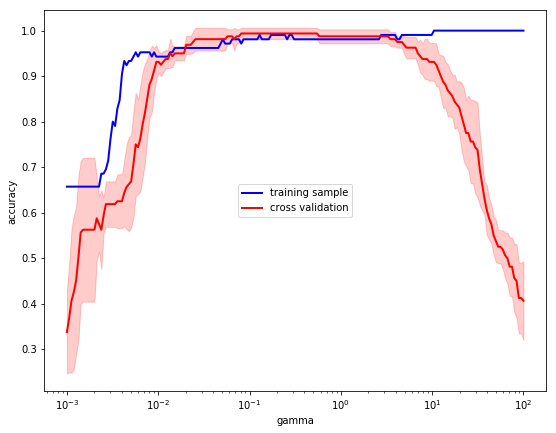

In [40]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

iris = load_iris()

X = iris.data
y = iris.target
clf = SVC(kernel='rbf', C=1, gamma=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Train accuracy: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))



from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=21)

scores = cross_val_score(clf, X_train, y_train, cv=cv)
print("Cross validation accuracy: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

fig = plt.figure(1, figsize=(9, 7))
ax = fig.add_subplot(111)

param_range = np.logspace(-3, 2, 200)
train_scores, xval_scores_mean, xval_scores_std = [], [], []

for g in param_range:
    svc = SVC(kernel='rbf', C=1, gamma=g)
    clf = svc.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    xval_scores_mean.append(cross_val_score(clf, X_train, y_train, cv=cv).mean())
    xval_scores_std.append(cross_val_score(clf, X_train, y_train, cv=cv).std())
    
xval_scores_mean = np.array(xval_scores_mean)
xval_scores_std = np.array(xval_scores_std)

best_param = param_range[np.argmax(xval_scores_mean)]
best_param_id = np.argmax(xval_scores_mean)

ax.plot(param_range, train_scores, label="training sample", color="b", lw=2)
ax.plot(param_range, xval_scores_mean, label="cross validation", color="r", lw=2)

# Fill the area between two horizontal curves.
# The curves are defined by the points (x, y1) and (x, y2).
# This creates one or multiple polygons describing the filled area.
plt.fill_between(param_range, xval_scores_mean - xval_scores_std,
                 xval_scores_mean + xval_scores_std, alpha=0.2, color="r")

ax.set_xscale( "log" )

plt.xlabel("gamma")
plt.ylabel("accuracy")
plt.axis("tight") # changes x and y axis limits such that all data is shown.
plt.legend(loc='center')

print("Best gamma value:", best_param)
svc = SVC(kernel='rbf', C=1, gamma=best_param)
clf = svc.fit(X_train, y_train)
print("Best train accuracy:", clf.score(X_train, y_train))
print("Best xval accuracy:", xval_scores_mean[best_param_id],"+/-", xval_scores_std[best_param_id])

print("Best test accuracy:", clf.score(X_test, y_test))

### GridSearch

In [41]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

grid_params = [ {'kernel': ['linear'], 
                    'C': [0.1, 1, 10, 100, 1000]},
                {'kernel': ['rbf'],
                 'gamma': [1E-3, 1E-2, 1E-1, 1E0, 1E1],
                 'C': [0.1, 1, 10, 100]}
              ]

clf = GridSearchCV(SVC(), grid_params, cv=5)
clf.fit(X_train, y_train)

print("Best parameters:",clf.best_params_)
print("Best score:",clf.best_score_)

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 0.9809523809523809


In [42]:
from scipy.stats import uniform

In [43]:
uniform(-1, 1)

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

rand_params = {'kernel': ['rbf'],
               'gamma': uniform(1E-2, 1E0),
               'C': uniform(0.1, 10)
               }

clf = RandomizedSearchCV(SVC(), rand_params, cv=5, n_iter=1000, random_state=112)
clf.fit(X_train, y_train)

print("Best parameters:",clf.best_params_)
print("Best score:",clf.best_score_)

Best parameters: {'C': 0.6480574028240825, 'gamma': 0.8276773821752682, 'kernel': 'rbf'}
Best score: 0.9809523809523809
